In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor


df = pd.read_csv('data.csv', index_col=0)
df['NextMonth10Y'] = df['10Y'].shift(-1)
df = df[:-1]
df = df.dropna()
df


,10Y,2Y,CPI,FedFunds,VIX,USD_Index,Oil,InflExp,CPI_YoY,Slope,Δ10Y,GDP_Real_SAAR,Federal_Debt_Billions,Debt_To_GDP,NextMonth10Y
2016-02-29,1.74,0.78,237.336,0.38,20.55,114.2418,32.74,1.23,0.847278,0.96,-0.20,18892.206,18922179.0,1001.586527,1.78
2016-03-31,1.78,0.73,238.080,0.36,13.95,109.9191,36.94,1.49,0.891616,1.05,0.04,19001.690,19264939.0,1013.853978,1.83
2016-04-30,1.83,0.77,238.992,0.37,15.70,108.8274,45.98,1.60,1.172626,1.06,0.05,19001.690,19264939.0,1013.853978,1.84
2016-05-31,1.84,0.87,239.557,0.37,14.19,112.4276,49.10,1.47,1.078476,0.97,0.01,19001.690,19264939.0,1013.853978,1.49
2016-06-30,1.49,0.58,240.222,0.38,15.63,112.1618,48.27,1.38,1.079287,0.91,-0.35,19062.709,19381591.0,1016.728053,1.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-31,4.23,3.89,319.615,4.33,22.28,126.9402,71.87,2.61,2.405585,0.34,-0.01,23548.210,36214310.0,1537.879525,4.17
2025-04-30,4.17,3.60,320.321,4.33,24.70,122.9440,59.55,2.29,2.333747,0.57,-0.06,23548.210,36214310.0,1537.879525,4.41
2025-05-31,4.41,3.89,320.580,4.33,18.57,122.1112,61.46,2.39,2.375934,0.52,0.24,23548.210,36214310.0,1537.879525,4.24
2025-06-30,4.24,3.72,321.500,4.33,16.73,119.8269,66.30,2.31,2.672683,0.52,-0.17,23770.976,36211469.0,1523.348011,4.37


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['CPI', 'CPI_YoY', 'InflExp', 'Oil',
            '2Y', 'FedFunds', 'Slope',
            'VIX', 'USD_Index',
            'Federal_Debt_Billions', 'Debt_To_GDP',
            'GDP_Real_SAAR']

X = df[features].copy()
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


inflation_cols = ['CPI', 'CPI_YoY', 'InflExp', 'Oil']
X_infl = df[inflation_cols].fillna(method='ffill').fillna(method='bfill')

scaler = StandardScaler()
X_infl_scaled = scaler.fit_transform(X_infl)
pca = PCA()
pca.fit(X_infl_scaled)
inflation_factor = pca.transform(X_infl_scaled)[:, 0]
df['Inflation_Factor'] = inflation_factor
print("Explained variance ratios:", pca.explained_variance_ratio_)


Explained variance ratios: [0.78195393 0.14032159 0.0458159  0.03190858]


/var/folders/gr/_9bw3rfs1_n0_d9qwycddj_r0000gn/T/ipykernel_21256/3360069755.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_infl = df[inflation_cols].fillna(method='ffill').fillna(method='bfill')


In [18]:
policy_cols = ['2Y', 'FedFunds', 'Slope']
X_pol = df[policy_cols].fillna(method='ffill').fillna(method='bfill')
X_pol_scaled = StandardScaler().fit_transform(X_pol)
pca_pol = PCA()
pca_pol.fit(X_pol_scaled)
print("Policy variance:", pca_pol.explained_variance_ratio_)
df['Policy_Factor'] = pca_pol.transform(X_pol_scaled)[:, 0]


Policy variance: [0.89914128 0.08173053 0.01912819]


/var/folders/gr/_9bw3rfs1_n0_d9qwycddj_r0000gn/T/ipykernel_21256/3325698537.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_pol = df[policy_cols].fillna(method='ffill').fillna(method='bfill')


In [19]:
risk_cols = ['VIX', 'USD_Index']
X_risk = df[risk_cols].fillna(method='ffill').fillna(method='bfill')
X_risk_scaled = StandardScaler().fit_transform(X_risk)
pca_risk = PCA()
pca_risk.fit(X_risk_scaled)
print("Risk variance:", pca_risk.explained_variance_ratio_)
df['Risk_Factor'] = pca_risk.transform(X_risk_scaled)[:, 0]


Risk variance: [0.63324551 0.36675449]


/var/folders/gr/_9bw3rfs1_n0_d9qwycddj_r0000gn/T/ipykernel_21256/59841521.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_risk = df[risk_cols].fillna(method='ffill').fillna(method='bfill')


In [20]:
fiscal_cols = ['Federal_Debt_Billions', 'Debt_To_GDP']
X_fisc = df[fiscal_cols].fillna(method='ffill').fillna(method='bfill')
X_fisc_scaled = StandardScaler().fit_transform(X_fisc)
pca_fisc = PCA()
pca_fisc.fit(X_fisc_scaled)
print("Fiscal variance:", pca_fisc.explained_variance_ratio_)
df['Fiscal_Factor'] = pca_fisc.transform(X_fisc_scaled)[:, 0]


Fiscal variance: [0.99328194 0.00671806]


/var/folders/gr/_9bw3rfs1_n0_d9qwycddj_r0000gn/T/ipykernel_21256/124797496.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_fisc = df[fiscal_cols].fillna(method='ffill').fillna(method='bfill')


In [21]:
df['Growth_Factor'] = StandardScaler().fit_transform(df[['GDP_Real_SAAR']])


In [ ]:
import statsmodels.api as sm


X = df[['Inflation_Factor', 'Policy_Factor', 'Risk_Factor', 'Fiscal_Factor', 'Growth_Factor']]
y = df['10Y']
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    10Y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     95.63
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           4.91e-38
Time:                        00:18:38   Log-Likelihood:                -83.174
No. Observations:                 114   AIC:                             178.3
Df Residuals:                     108   BIC:                             194.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6279      0.048  

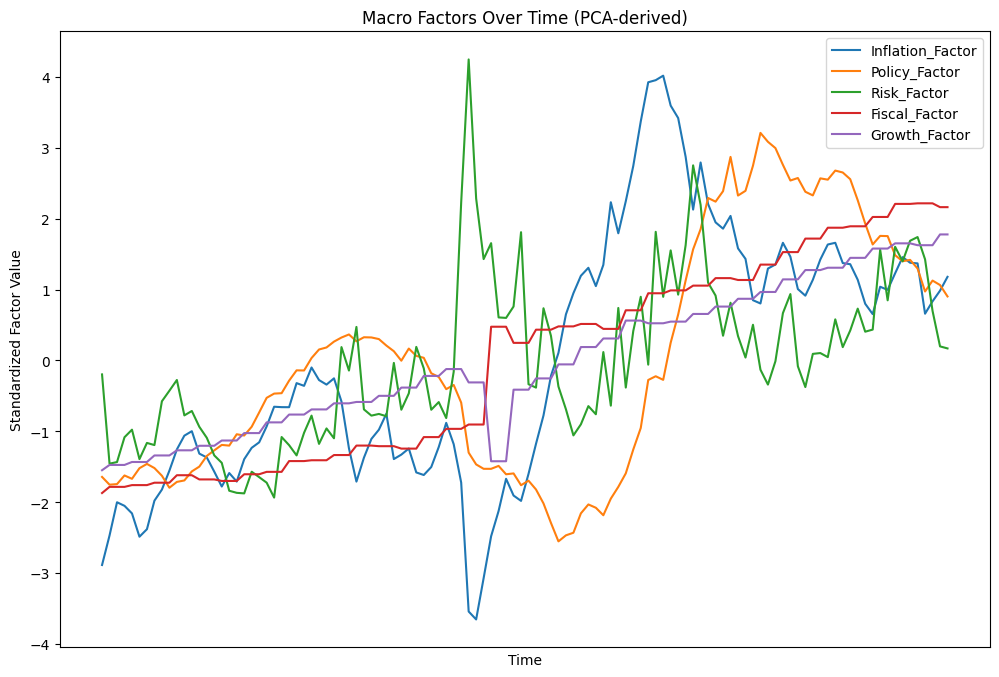

In [ ]:
import matplotlib.pyplot as plt

factors = ['Inflation_Factor', 'Policy_Factor', 'Risk_Factor', 'Fiscal_Factor', 'Growth_Factor']

plt.figure(figsize=(12, 8))
for f in factors:
    plt.plot(df[f], label=f)
plt.title('Macro Factors Over Time (PCA-derived)')
plt.xlabel('Time')
plt.ylabel('Standardized Factor Value')
plt.legend()
plt.xticks([])
plt.show()


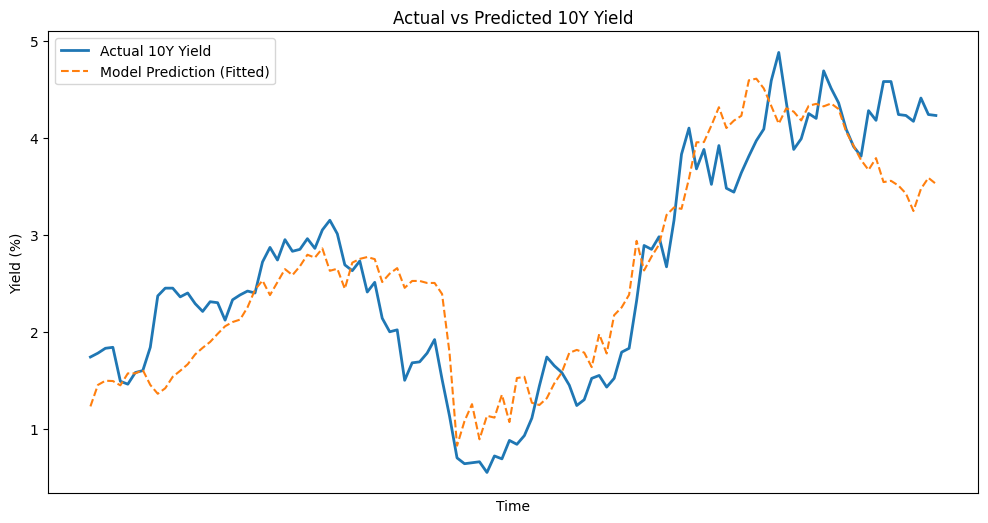

In [29]:
df['Predicted_10Y'] = model.predict(sm.add_constant(df[['Inflation_Factor', 'Policy_Factor', 'Risk_Factor', 'Fiscal_Factor', 'Growth_Factor']]))

plt.figure(figsize=(12, 6))
plt.plot(df['10Y'], label='Actual 10Y Yield', linewidth=2)
plt.plot(df['Predicted_10Y'], label='Model Prediction (Fitted)', linestyle='--')
plt.title('Actual vs Predicted 10Y Yield')
plt.xlabel('Time')
plt.ylabel('Yield (%)')
plt.legend()
plt.xticks([])
plt.show()
